# Logistic Regression Tutorial

## Learning Objectives
By the end of this notebook, you will understand:
1. **What is Logistic Regression** - A classification algorithm
2. **Probability Estimation** - How logistic regression estimates probabilities
3. **Cost Function** - The mathematical foundation
4. **Decision Boundaries** - How classification decisions are made

Let's start with the basics!


## 1. What is Logistic Regression?

**Logistic Regression** is a classification algorithm that predicts the probability of an instance belonging to a particular class.

### Key Differences from Linear Regression:
- **Linear Regression**: Predicts continuous values (like house prices)
- **Logistic Regression**: Predicts probabilities and class labels (like spam/not spam)

### The Sigmoid Function
Logistic regression uses the **sigmoid function** to squash any real number into a value between 0 and 1:


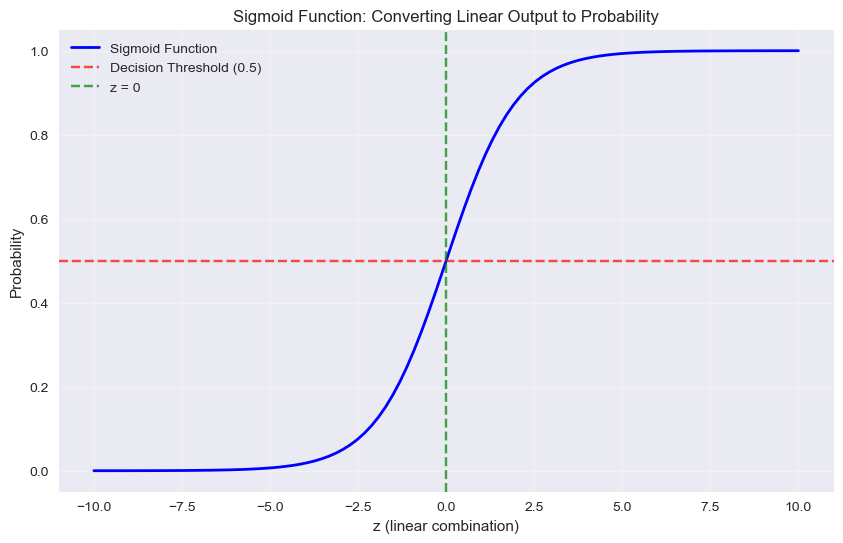

Key Properties of Sigmoid Function:
• Output range: (0, 1)
• When z = 0, probability = 0.5
• When z > 0, probability > 0.5 (more likely class 1)
• When z < 0, probability < 0.5 (more likely class 0)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Define sigmoid function
def sigmoid(z):
    """Sigmoid function: converts any real number to a value between 0 and 1"""
    return 1 / (1 + np.exp(-z))

# Create range of values
z = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z)

# Plot sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid_values, 'b-', linewidth=2, label='Sigmoid Function')
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Decision Threshold (0.5)')
plt.axvline(x=0, color='g', linestyle='--', alpha=0.7, label='z = 0')
plt.xlabel('z (linear combination)')
plt.ylabel('Probability')
plt.title('Sigmoid Function: Converting Linear Output to Probability')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Key Properties of Sigmoid Function:")
print("• Output range: (0, 1)")
print("• When z = 0, probability = 0.5")
print("• When z > 0, probability > 0.5 (more likely class 1)")
print("• When z < 0, probability < 0.5 (more likely class 0)")


## 2. Probability Estimation

### How Logistic Regression Estimates Probabilities

The probability that an instance belongs to class 1 is:

$$P(y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n)}}$$

Where:
- $\beta_0$ is the intercept (bias)
- $\beta_1, \beta_2, ..., \beta_n$ are the coefficients
- $x_1, x_2, ..., x_n$ are the feature values

Let's see this in action with a simple example:


In [3]:
# Create a simple 2D classification dataset
np.random.seed(42)
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                          n_informative=2, n_clusters_per_class=1, 
                          random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Get predictions and probabilities
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)

print("Model Coefficients:")
print(f"Intercept (β₀): {log_reg.intercept_[0]:.4f}")
print(f"Coefficient 1 (β₁): {log_reg.coef_[0][0]:.4f}")
print(f"Coefficient 2 (β₂): {log_reg.coef_[0][1]:.4f}")
print()

print("Example Predictions:")
print("Instance | Features | Predicted Class | Probability Class 0 | Probability Class 1")
print("-" * 80)
for i in range(5):
    features = X_test[i]
    pred_class = y_pred[i]
    proba_0 = y_proba[i][0]
    proba_1 = y_proba[i][1]
    print(f"{i+1:8d} | [{features[0]:6.2f}, {features[1]:6.2f}] | {pred_class:15d} | {proba_0:18.4f} | {proba_1:18.4f}")


Model Coefficients:
Intercept (β₀): 0.4670
Coefficient 1 (β₁): 1.8008
Coefficient 2 (β₂): -0.4937

Example Predictions:
Instance | Features | Predicted Class | Probability Class 0 | Probability Class 1
--------------------------------------------------------------------------------
       1 | [ -0.62,   2.99] |               0 |             0.8939 |             0.1061
       2 | [  0.47,   0.79] |               1 |             0.2848 |             0.7152
       3 | [  0.30,   0.23] |               1 |             0.2895 |             0.7105
       4 | [  0.18,   0.37] |               1 |             0.3533 |             0.6467
       5 | [  1.10,   1.64] |               1 |             0.1639 |             0.8361


### Understanding the Probability Output

Let's visualize how the model assigns probabilities to different regions:


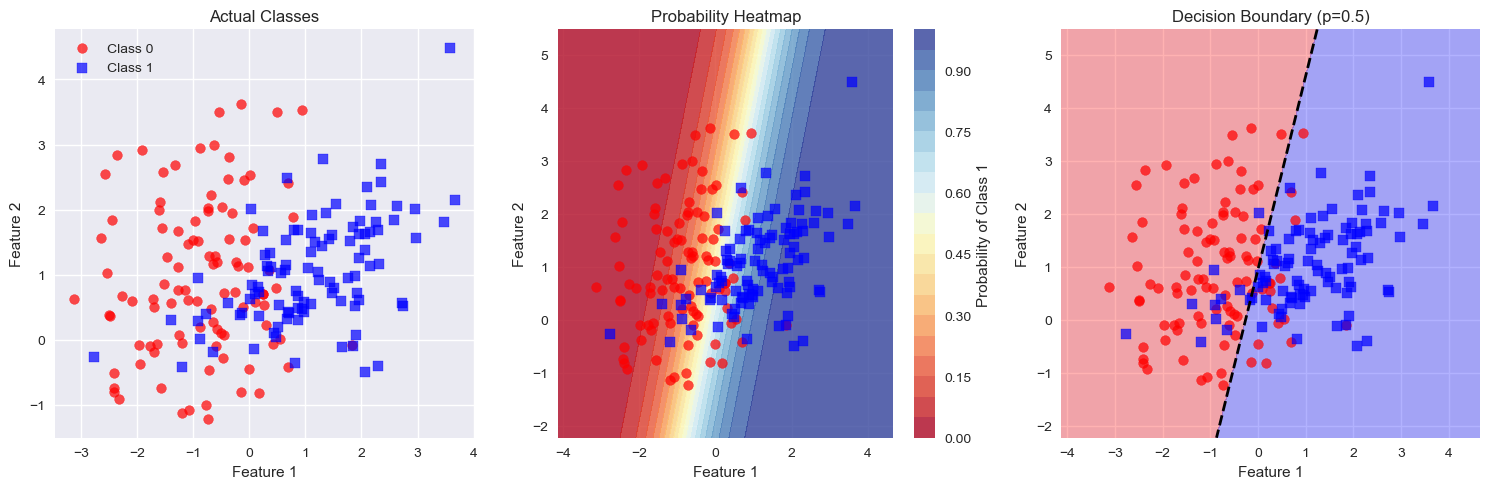

Key Insights:
• Red regions: High probability of Class 0 (p < 0.5)
• Blue regions: High probability of Class 1 (p > 0.5)
• Black dashed line: Decision boundary where p = 0.5
• The model is confident in regions far from the decision boundary


In [4]:
# Create a mesh grid for visualization
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Get probability predictions for the mesh
Z = log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(15, 5))

# Plot 1: Scatter plot with actual classes
plt.subplot(1, 3, 1)
plt.scatter(X[y==0, 0], X[y==0, 1], c='red', marker='o', label='Class 0', alpha=0.7)
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', marker='s', label='Class 1', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Actual Classes')
plt.legend()

# Plot 2: Probability heatmap
plt.subplot(1, 3, 2)
contour = plt.contourf(xx, yy, Z, levels=20, cmap='RdYlBu', alpha=0.8)
plt.colorbar(contour, label='Probability of Class 1')
plt.scatter(X[y==0, 0], X[y==0, 1], c='red', marker='o', alpha=0.7)
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', marker='s', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Probability Heatmap')

# Plot 3: Decision boundary
plt.subplot(1, 3, 3)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--', linewidths=2)
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['red', 'blue'], alpha=0.3)
plt.scatter(X[y==0, 0], X[y==0, 1], c='red', marker='o', alpha=0.7)
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', marker='s', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary (p=0.5)')

plt.tight_layout()
plt.show()

print("Key Insights:")
print("• Red regions: High probability of Class 0 (p < 0.5)")
print("• Blue regions: High probability of Class 1 (p > 0.5)")
print("• Black dashed line: Decision boundary where p = 0.5")
print("• The model is confident in regions far from the decision boundary")


## 3. Cost Function

### Why We Need a Special Cost Function

Unlike linear regression which uses Mean Squared Error, logistic regression uses **Log Loss** (also called Cross-Entropy Loss) because:

1. **MSE doesn't work well** for probabilities (it's not convex)
2. **Log Loss penalizes confident wrong predictions** more heavily
3. **It's designed for probability outputs**

### The Log Loss Function

For a single instance:

$$\text{Cost} = -[y \log(p) + (1-y) \log(1-p)]$$

Where:
- $y$ is the actual class (0 or 1)
- $p$ is the predicted probability of class 1

Let's visualize how this cost function works:


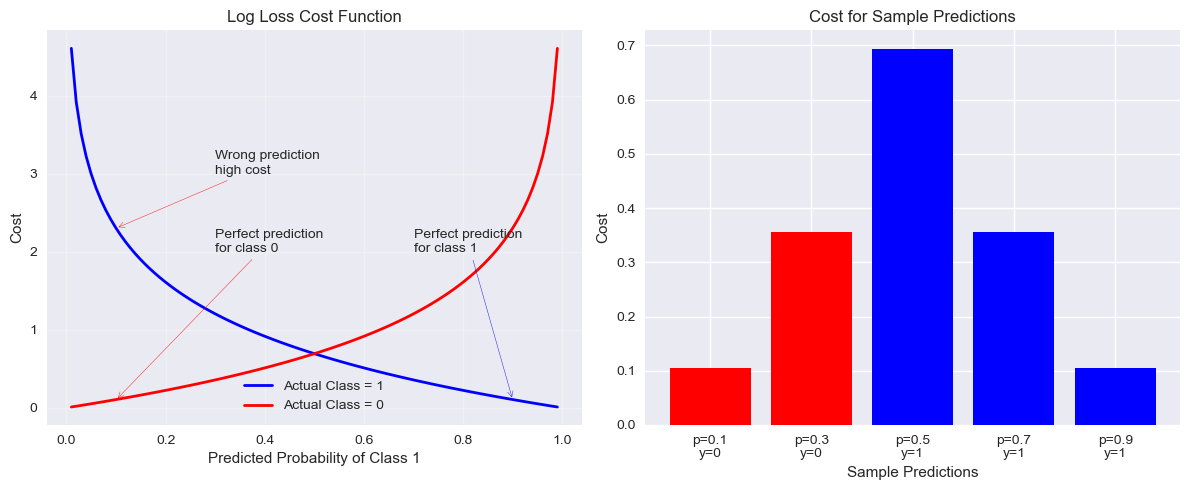

Key Properties of Log Loss:
• Cost = 0 when prediction is perfect
• Cost increases as prediction gets worse
• Very confident wrong predictions have very high cost
• This encourages the model to be confident only when it's right


In [5]:
# Define log loss function
def log_loss(y_true, y_pred_prob):
    """Calculate log loss for binary classification"""
    # Avoid log(0) by adding small epsilon
    epsilon = 1e-15
    y_pred_prob = np.clip(y_pred_prob, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred_prob) + (1 - y_true) * np.log(1 - y_pred_prob))

# Create probability range
prob_range = np.linspace(0.01, 0.99, 100)

# Calculate costs for different scenarios
cost_class_1 = -np.log(prob_range)  # When actual class is 1
cost_class_0 = -np.log(1 - prob_range)  # When actual class is 0

# Plot the cost functions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(prob_range, cost_class_1, 'b-', linewidth=2, label='Actual Class = 1')
plt.plot(prob_range, cost_class_0, 'r-', linewidth=2, label='Actual Class = 0')
plt.xlabel('Predicted Probability of Class 1')
plt.ylabel('Cost')
plt.title('Log Loss Cost Function')
plt.legend()
plt.grid(True, alpha=0.3)

# Add annotations
plt.annotate('Perfect prediction\nfor class 1', xy=(0.9, 0.1), xytext=(0.7, 2),
            arrowprops=dict(arrowstyle='->', color='blue'), fontsize=10)
plt.annotate('Perfect prediction\nfor class 0', xy=(0.1, 0.1), xytext=(0.3, 2),
            arrowprops=dict(arrowstyle='->', color='red'), fontsize=10)
plt.annotate('Wrong prediction\nhigh cost', xy=(0.1, 2.3), xytext=(0.3, 3),
            arrowprops=dict(arrowstyle='->', color='red'), fontsize=10)

# Demonstrate with actual predictions
plt.subplot(1, 2, 2)
sample_probs = [0.1, 0.3, 0.5, 0.7, 0.9]
sample_actuals = [0, 0, 1, 1, 1]
sample_costs = []

for prob, actual in zip(sample_probs, sample_actuals):
    if actual == 1:
        cost = -np.log(prob)
    else:
        cost = -np.log(1 - prob)
    sample_costs.append(cost)

plt.bar(range(len(sample_probs)), sample_costs, color=['red', 'red', 'blue', 'blue', 'blue'])
plt.xlabel('Sample Predictions')
plt.ylabel('Cost')
plt.title('Cost for Sample Predictions')
plt.xticks(range(len(sample_probs)), [f'p={p}\ny={y}' for p, y in zip(sample_probs, sample_actuals)])

plt.tight_layout()
plt.show()

print("Key Properties of Log Loss:")
print("• Cost = 0 when prediction is perfect")
print("• Cost increases as prediction gets worse")
print("• Very confident wrong predictions have very high cost")
print("• This encourages the model to be confident only when it's right")


### Calculating Log Loss for Our Model

Let's calculate the actual log loss for our trained model:


In [6]:
# Get probabilities for test set
y_proba_test = log_reg.predict_proba(X_test)

# Calculate log loss
log_loss_value = log_loss(y_test, y_proba_test)

print(f"Log Loss on Test Set: {log_loss_value:.4f}")
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_pred):.4f}")
print()

# Show detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Demonstrate cost calculation for a few examples
print("\nCost Calculation Examples:")
print("Instance | Actual | Predicted Prob | Predicted Class | Cost")
print("-" * 65)

for i in range(5):
    actual = y_test[i]
    prob = y_proba_test[i][1]  # Probability of class 1
    pred_class = y_pred[i]
    
    # Calculate individual cost
    if actual == 1:
        individual_cost = -np.log(prob)
    else:
        individual_cost = -np.log(1 - prob)
    
    print(f"{i+1:8d} | {actual:6d} | {prob:13.4f} | {pred_class:15d} | {individual_cost:.4f}")


ValueError: operands could not be broadcast together with shapes (60,) (60,2) 

## 4. Decision Boundaries

### What is a Decision Boundary?

A **decision boundary** is the line (in 2D) or surface (in higher dimensions) that separates different classes. In logistic regression:

- **Decision boundary**: Where the probability equals 0.5
- **Equation**: $\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n = 0$

### Visualizing Decision Boundaries

Let's see how decision boundaries change with different thresholds:


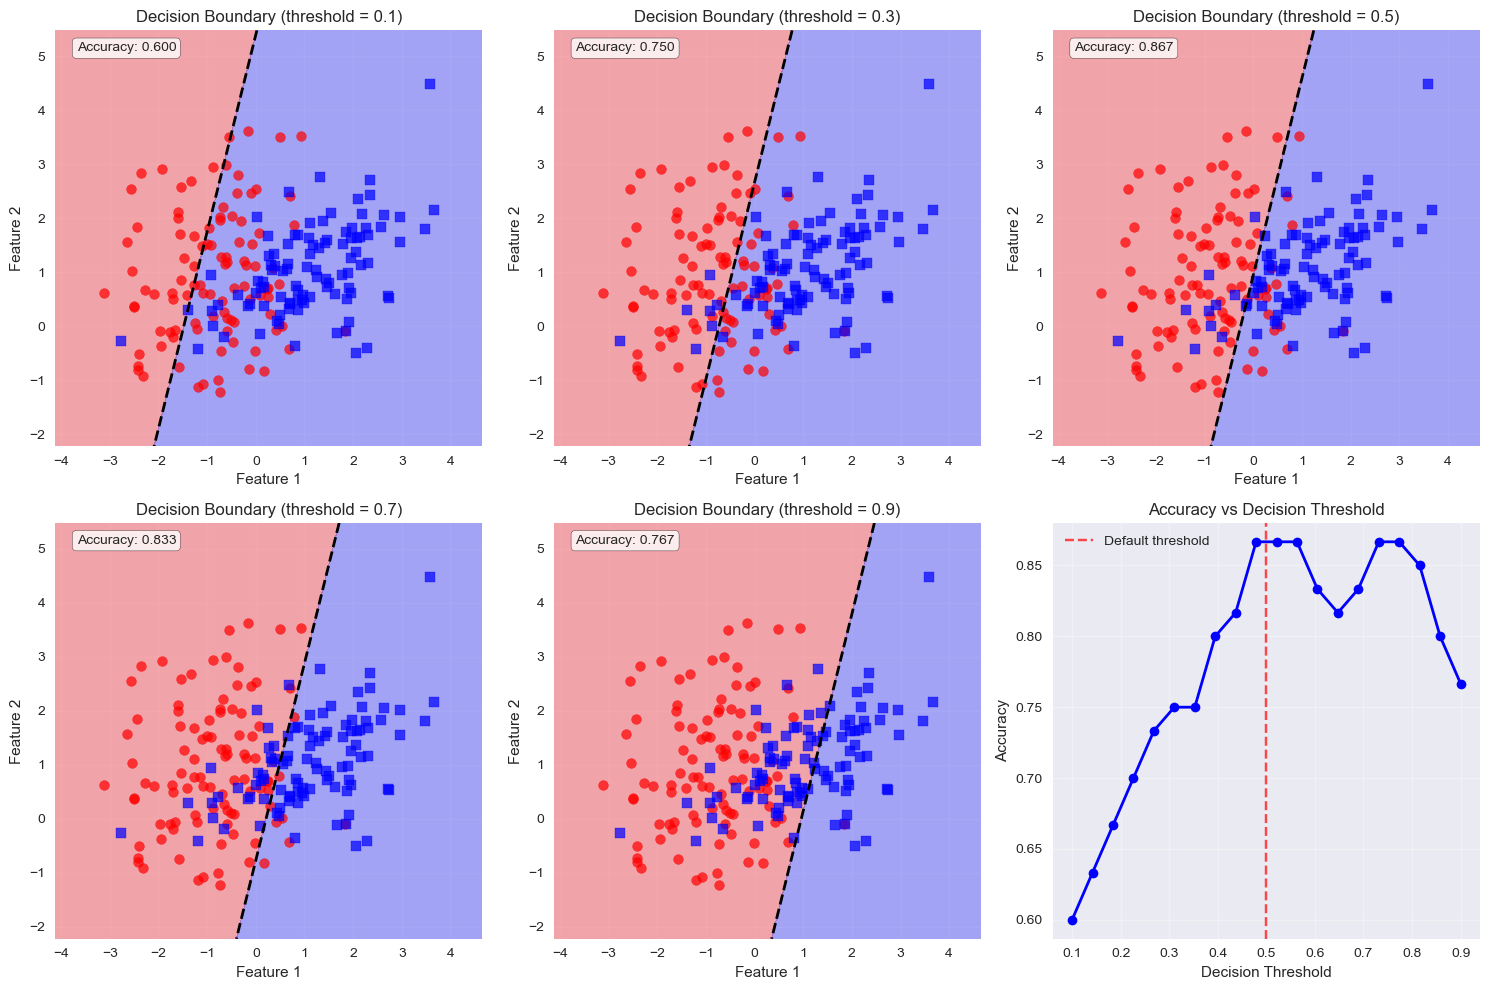

Key Insights about Decision Boundaries:
• Lower thresholds: More instances classified as Class 1
• Higher thresholds: More instances classified as Class 0
• Threshold = 0.5: Balanced approach (default)
• Optimal threshold depends on your specific use case


In [7]:
# Create decision boundaries for different thresholds
thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

plt.figure(figsize=(15, 10))

for i, threshold in enumerate(thresholds):
    plt.subplot(2, 3, i+1)
    
    # Get probability predictions
    Z = log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary for this threshold
    plt.contour(xx, yy, Z, levels=[threshold], colors='black', linestyles='--', linewidths=2)
    plt.contourf(xx, yy, Z, levels=[0, threshold, 1], colors=['red', 'blue'], alpha=0.3)
    
    # Plot data points
    plt.scatter(X[y==0, 0], X[y==0, 1], c='red', marker='o', alpha=0.7, s=50)
    plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', marker='s', alpha=0.7, s=50)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary (threshold = {threshold})')
    plt.grid(True, alpha=0.3)
    
    # Calculate accuracy with this threshold
    y_pred_thresh = (log_reg.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    plt.text(0.05, 0.95, f'Accuracy: {acc:.3f}', transform=plt.gca().transAxes, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add a summary plot
plt.subplot(2, 3, 6)
threshold_range = np.linspace(0.1, 0.9, 20)
accuracies = []

for thresh in threshold_range:
    y_pred_thresh = (log_reg.predict_proba(X_test)[:, 1] >= thresh).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    accuracies.append(acc)

plt.plot(threshold_range, accuracies, 'b-', linewidth=2, marker='o')
plt.axvline(x=0.5, color='r', linestyle='--', alpha=0.7, label='Default threshold')
plt.xlabel('Decision Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Decision Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Key Insights about Decision Boundaries:")
print("• Lower thresholds: More instances classified as Class 1")
print("• Higher thresholds: More instances classified as Class 0")
print("• Threshold = 0.5: Balanced approach (default)")
print("• Optimal threshold depends on your specific use case")


### Decision Boundary Equation

Let's derive and visualize the actual decision boundary equation:


Decision Boundary Equation:
β₀ + β₁x₁ + β₂x₂ = 0
0.4670 + 1.8008x₁ + -0.4937x₂ = 0

Solving for x₂ (assuming x₁ is on x-axis):
x₂ = -(0.4670 + 1.8008x₁) / -0.4937
x₂ = 0.9459 + 3.6475x₁



C:\Users\wajah\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wajah\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


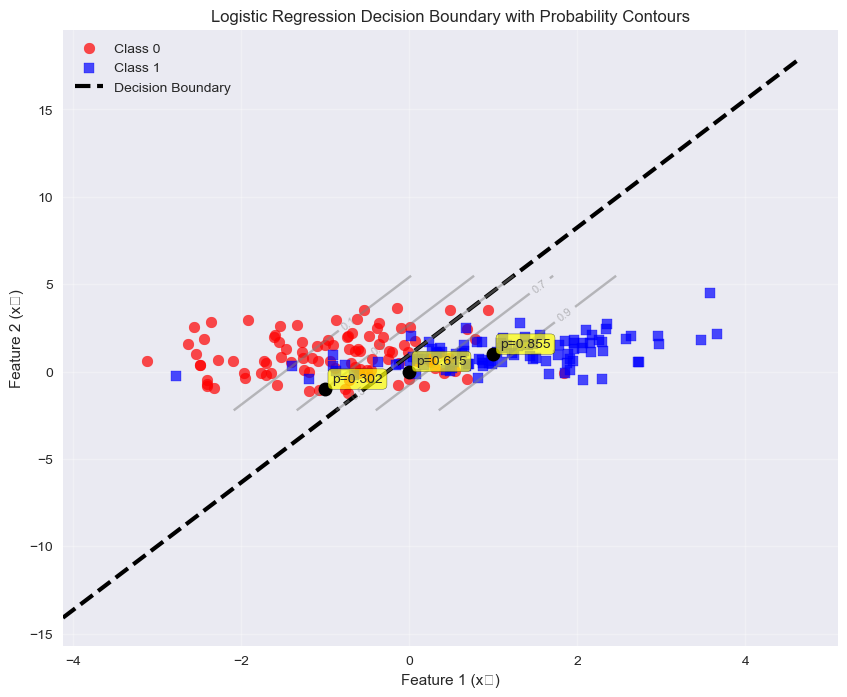

Mathematical Interpretation:
• The decision boundary is a straight line with slope: 3.6475
• The decision boundary intercepts x₂-axis at: 0.9459
• Points above the line are more likely to be Class 1
• Points below the line are more likely to be Class 0


In [8]:
# Get model parameters
intercept = log_reg.intercept_[0]
coef1 = log_reg.coef_[0][0]
coef2 = log_reg.coef_[0][1]

print("Decision Boundary Equation:")
print(f"β₀ + β₁x₁ + β₂x₂ = 0")
print(f"{intercept:.4f} + {coef1:.4f}x₁ + {coef2:.4f}x₂ = 0")
print()
print("Solving for x₂ (assuming x₁ is on x-axis):")
print(f"x₂ = -({intercept:.4f} + {coef1:.4f}x₁) / {coef2:.4f}")
print(f"x₂ = {(-intercept/coef2):.4f} + {(-coef1/coef2):.4f}x₁")
print()

# Create the decision boundary line
x1_line = np.linspace(x_min, x_max, 100)
x2_line = (-intercept - coef1 * x1_line) / coef2

# Plot the decision boundary
plt.figure(figsize=(10, 8))

# Plot data points
plt.scatter(X[y==0, 0], X[y==0, 1], c='red', marker='o', alpha=0.7, s=60, label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', marker='s', alpha=0.7, s=60, label='Class 1')

# Plot decision boundary
plt.plot(x1_line, x2_line, 'k--', linewidth=3, label='Decision Boundary')

# Add probability contours
Z = log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
contour = plt.contour(xx, yy, Z, levels=[0.1, 0.3, 0.5, 0.7, 0.9], colors='gray', alpha=0.5)
plt.clabel(contour, inline=True, fontsize=8)

plt.xlabel('Feature 1 (x₁)')
plt.ylabel('Feature 2 (x₂)')
plt.title('Logistic Regression Decision Boundary with Probability Contours')
plt.legend()
plt.grid(True, alpha=0.3)

# Add some example points
example_points = np.array([[0, 0], [1, 1], [-1, -1]])
for i, point in enumerate(example_points):
    prob = log_reg.predict_proba([point])[0][1]
    plt.plot(point[0], point[1], 'ko', markersize=10)
    plt.annotate(f'p={prob:.3f}', (point[0], point[1]), xytext=(5, 5), 
                textcoords='offset points', fontsize=10, 
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.show()

print("Mathematical Interpretation:")
print(f"• The decision boundary is a straight line with slope: {(-coef1/coef2):.4f}")
print(f"• The decision boundary intercepts x₂-axis at: {(-intercept/coef2):.4f}")
print(f"• Points above the line are more likely to be Class 1")
print(f"• Points below the line are more likely to be Class 0")


## 5. Practical Example: Email Spam Detection

Let's apply logistic regression to a real-world scenario - email spam detection:


In [1]:
# Create a synthetic email dataset
np.random.seed(42)

# Features: [word_count, exclamation_count, uppercase_ratio, contains_money_words]
n_samples = 1000

# Generate features
word_count = np.random.poisson(50, n_samples)  # Average 50 words
exclamation_count = np.random.poisson(2, n_samples)  # Average 2 exclamation marks
uppercase_ratio = np.random.beta(2, 8, n_samples)  # Most emails have low uppercase ratio
contains_money_words = np.random.binomial(1, 0.1, n_samples)  # 10% contain money words

# Create feature matrix
X_email = np.column_stack([word_count, exclamation_count, uppercase_ratio, contains_money_words])

# Create target variable (spam = 1, not spam = 0)
# Higher exclamation count, uppercase ratio, and money words increase spam probability
spam_prob = 1 / (1 + np.exp(-(0.1 * word_count + 2 * exclamation_count + 5 * uppercase_ratio + 3 * contains_money_words - 3)))
y_email = np.random.binomial(1, spam_prob)

# Split the data
X_train_email, X_test_email, y_train_email, y_test_email = train_test_split(
    X_email, y_email, test_size=0.3, random_state=42, stratify=y_email
)

# Train logistic regression model
email_model = LogisticRegression(random_state=42)
email_model.fit(X_train_email, y_train_email)

# Make predictions
y_pred_email = email_model.predict(X_test_email)
y_proba_email = email_model.predict_proba(X_test_email)

print("Email Spam Detection Model")
print("=" * 40)
print(f"Training samples: {len(X_train_email)}")
print(f"Test samples: {len(X_test_email)}")
print(f"Spam rate in training: {y_train_email.mean():.3f}")
print(f"Spam rate in test: {y_test_email.mean():.3f}")
print()

print("Model Coefficients:")
feature_names = ['Word Count', 'Exclamation Count', 'Uppercase Ratio', 'Contains Money Words']
for name, coef in zip(feature_names, email_model.coef_[0]):
    print(f"{name:20s}: {coef:8.4f}")
print(f"{'Intercept':20s}: {email_model.intercept_[0]:8.4f}")
print()

print("Model Performance:")
print(f"Accuracy: {accuracy_score(y_test_email, y_pred_email):.4f}")
print(f"Log Loss: {log_loss(y_test_email, y_proba_email):.4f}")
print()

print("Classification Report:")
print(classification_report(y_test_email, y_pred_email, target_names=['Not Spam', 'Spam']))


NameError: name 'np' is not defined

### Interpreting the Email Spam Model

Let's understand what the model learned:


In [ ]:
# Create example emails
example_emails = [
    [30, 0, 0.05, 0],  # Normal email
    [20, 5, 0.3, 1],   # Spam email
    [100, 1, 0.1, 0],  # Long normal email
    [15, 8, 0.4, 1],   # Obvious spam
]

email_descriptions = [
    "Normal email: 30 words, no exclamations, low uppercase, no money words",
    "Spam email: 20 words, 5 exclamations, high uppercase, contains money words",
    "Long normal email: 100 words, 1 exclamation, low uppercase, no money words",
    "Obvious spam: 15 words, 8 exclamations, very high uppercase, contains money words"
]

print("Email Classification Examples:")
print("=" * 60)
print("Email Description | Spam Probability | Predicted Class | Actual Class")
print("-" * 80)

for i, (email, desc) in enumerate(zip(example_emails, email_descriptions)):
    prob = email_model.predict_proba([email])[0][1]
    pred_class = email_model.predict([email])[0]
    
    # Generate actual class based on our synthetic data rules
    spam_prob_actual = 1 / (1 + np.exp(-(0.1 * email[0] + 2 * email[1] + 5 * email[2] + 3 * email[3] - 3)))
    actual_class = 1 if spam_prob_actual > 0.5 else 0
    
    print(f"{desc[:40]:40s} | {prob:15.4f} | {pred_class:14d} | {actual_class:12d}")

# Visualize feature importance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
coefficients = email_model.coef_[0]
colors = ['red' if c < 0 else 'blue' for c in coefficients]
plt.barh(feature_names, coefficients, color=colors, alpha=0.7)
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients\n(Blue = increases spam probability, Red = decreases)')
plt.grid(True, alpha=0.3)

# Show probability distribution
plt.subplot(1, 2, 2)
spam_probs = y_proba_email[:, 1]
plt.hist(spam_probs[y_test_email == 0], bins=20, alpha=0.7, label='Not Spam', color='blue')
plt.hist(spam_probs[y_test_email == 1], bins=20, alpha=0.7, label='Spam', color='red')
plt.axvline(x=0.5, color='black', linestyle='--', label='Decision Threshold')
plt.xlabel('Spam Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Spam Probabilities')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print("• Positive coefficients increase spam probability")
print("• Negative coefficients decrease spam probability")
print("• The model separates spam and non-spam emails well")
print("• Most emails have low spam probability (blue histogram)")
print("• Spam emails cluster around higher probabilities (red histogram)")


## 6. Summary and Key Takeaways

### What We've Learned

1. **Logistic Regression Basics**
   - Classification algorithm that predicts probabilities
   - Uses sigmoid function to convert linear output to probabilities
   - Outputs values between 0 and 1

2. **Probability Estimation**
   - Model estimates P(y=1) using sigmoid function
   - Probability = 1 / (1 + e^(-z)) where z is linear combination
   - Higher z values → higher probability of class 1

3. **Cost Function (Log Loss)**
   - Penalizes confident wrong predictions heavily
   - Cost = -[y log(p) + (1-y) log(1-p)]
   - Encourages model to be confident only when correct

4. **Decision Boundaries**
   - Line where probability equals 0.5 (default threshold)
   - Equation: β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ = 0
   - Can adjust threshold based on business requirements

### When to Use Logistic Regression

✅ **Good for:**
- Binary classification problems
- When you need probability estimates
- Linear relationships between features and target
- Interpretable models

❌ **Not ideal for:**
- Multi-class problems (without modifications)
- Non-linear relationships
- Very high-dimensional data
- When you need the highest possible accuracy

### Next Steps

1. **Practice with real datasets**
2. **Learn about regularization** (L1/L2)
3. **Explore multi-class logistic regression**
4. **Study advanced topics** like feature engineering

### Quick Reference

```python
# Basic Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create and train model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, predictions)
log_loss_value = log_loss(y_test, probabilities)
```

**Congratulations!** You now understand the fundamentals of logistic regression. Keep practicing with different datasets to solidify your understanding!
